Quelle: Prof. Dr. Christian Herta [ http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/reberGrammar.php ], besucht am 17.11.2018

# Reber Grammatik

Die Reber Grammatik wurde sich erdacht, um künstlich erzeugte sequenzielle Daten zu erschaffen. Es ist eine Grammatik die wie man es sich denken kann Regeln aufstellt für ein festes Alphabet. Sie wird gerne dazu verwendet um Daten zu erstellen, mit deren Hilfe RNNs auszuwerten. Ein gültiger String kann mit folgendem Automaten erstellt werden:

![Reber Grammar](images/reberGrammar.png)

In [1]:
import numpy as np
import rnn_code.reberGrammar as reber

examples = np.asarray(reber.get_n_examples(10))

input_examples, output_examples = np.asarray(reber.split_examples(examples))

print(examples.shape)

print("=========================")
print(examples[0][0] == input_examples[0])

print("=========================")
print(examples[0][1] == output_examples[0])

print("=========================")
print(reber.sequenceToWord(examples[0][0]))
print(reber.sequenceToWord(examples[0][1]))

print(reber.sequenceToWord(input_examples[0]))
print(reber.sequenceToWord(output_examples[0]))

(10, 2)
True
True
BPTTTVPXTTVPS
TTTTTPSTTTPSE
BPTTTVPXTTVPS
TTTTTPSTTTPSE


## RNN

### Imports

In [1]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Train

Epoch 5 : 10.0% done | Cost: 3.000407834420912
Epoch 10 : 20.0% done | Cost: 0.15323496016208082
Epoch 15 : 30.0% done | Cost: 0.010716452693941392
Epoch 20 : 40.0% done | Cost: 0.0008229230972744972
Epoch 25 : 50.0% done | Cost: 0.30605308013764443
Epoch 30 : 60.0% done | Cost: 0.03266009007165849
Epoch 35 : 70.0% done | Cost: 0.0021911824945846092
Epoch 40 : 80.0% done | Cost: 0.00024307251603516988
Epoch 45 : 90.0% done | Cost: 4.420410560257437e-05
Epoch 50 : 100.0% done | Cost: 3.486041891959113e-06
Duration: 421.5617091655731sec


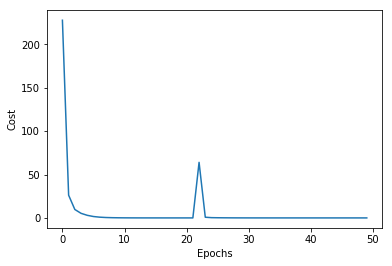

In [2]:
examples = rg.get_n_examples(1000)
x_train, y_train = np.asarray(rg.split_examples(examples))

rnn = RNN.RNN();
rnn.train(x_train, y_train, epochs=50)
rnn.plot()

### Predict

In [3]:
test = rg.get_n_examples(1)
x_test, y_test = rg.split_examples(test)

pre = rnn.predict(x_test[0])

print((pre >= 0.5).astype(float) == y_test[0])

[[[ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]]]


### Sampling

In [4]:
start_sequenze = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequenze = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

for i in range(20):
    samples = rnn.sample(start_sequenze, end_sequenze)
    word = rg.sequenceToWord(samples[0])
    print("WORD: {} in grammar: {}".format(word, rg.in_grammar(word)))

print("")
    
acc = RNN.get_rg_sample_accuracy(rnn, n=1000)

WORD: BTXSE in grammar: True
WORD: BTXXTTVPXVPSE in grammar: True
WORD: BPVPXTVPSE in grammar: True
WORD: BPVVE in grammar: True
WORD: BPTVVE in grammar: True
WORD: BTSSXSE in grammar: True
WORD: BPVPSE in grammar: True
WORD: BTSXXTVVE in grammar: True
WORD: BTXSE in grammar: True
WORD: BPVPXTVVE in grammar: True
WORD: BPTVPXTVPSE in grammar: True
WORD: BTSXSE in grammar: True
WORD: BTXXTTVPSE in grammar: True
WORD: BPVPSE in grammar: True
WORD: BTSSXXTTTVVE in grammar: True
WORD: BPVVE in grammar: True
WORD: BPVVE in grammar: True
WORD: BPVVE in grammar: True
WORD: BTXSE in grammar: True
WORD: BTSSSSXSE in grammar: True

Sample acc: 100.0% over 1000 samples
Duration: 9.049683570861816sec


## RNN embedded test

Epoch 10 : 10.0% done | Cost: 12.198819043114781
Epoch 20 : 20.0% done | Cost: 12.20152692636475
Epoch 30 : 30.0% done | Cost: 12.199152399785817
Epoch 40 : 40.0% done | Cost: 12.198714580386877
Epoch 50 : 50.0% done | Cost: 12.198669727891684
Epoch 60 : 60.0% done | Cost: 12.198648935183883
Epoch 70 : 70.0% done | Cost: 12.201887940987945
Epoch 80 : 80.0% done | Cost: 12.19873113092035
Epoch 90 : 90.0% done | Cost: 12.19856907101348
Epoch 100 : 100.0% done | Cost: 12.198599636554718
Duration: 1136.3261623382568sec


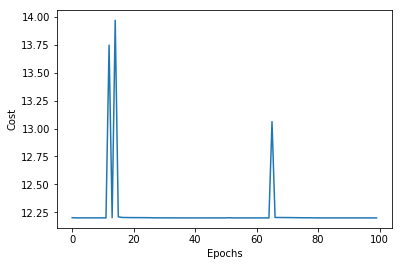

Sample acc: 46.0%


In [27]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np


examples = rg.get_n_embedded_examples(1000)
x_train, y_train = np.asarray(rg.split_examples(examples))

rnn = RNN.RNN();
rnn.train(x_train, y_train, epochs=100, load=True)
rnn.plot()


acc = RNN.get_rg_sample_accuracy(rnn, n=100, end_count=2)

## LSTM

### LSTM Hochreiter & Schmidhuber (1997) [ http://www.bioinf.jku.at/publications/older/2604.pdf ]

#### 1. step forget gate layer
$$f_t = \sigma (W_{fh} * h_{t-1} + W_{fx} * x_t + b_f) = \sigma (W_{f} * [h_{t-1},\; x_t] + b_f)$$

#### 2.1 step input gate layer
$$i_t = \sigma (W_{ih} * h_{t-1} + W_{ix} * x_t + b_i) = \sigma (W_{i} * [h_{t-1},\; x_t] + b_i)$$

#### 2.2 step new cell candidate values
$$CC_t = tanh(W_{Ch} * h_{t-1} + W_{Cx} * x_t + b_C) = tanh(W_{C} * [h_{t-1},\; x_t] + b_C)$$

#### 3. step cell values
$$C_t = f_t * C_{t-1} + i_t * CC_t$$

#### 4.1 step output gate layer
$$o_t = \sigma (W_{oh} * h_{t-1} + W_{ox} * x_t + b_o) = \sigma (W_{o} * [h_{t-1},\; x_t] + b_o)$$

#### 4.2 step output values
$$h_t = o_t * tanh(C_t)$$

### Imports

In [4]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np

### Train

In [5]:
examples = rg.get_n_embedded_examples(1000)
x_train, y_train = rg.split_examples(examples)

lstm = RNN.LSTM();
# lstm.train(x_train, y_train, epochs=100, load=False)
# lstm.plot()

In [3]:
x_train_set = set()

for x in x_train:
    x_train_set.add(rg.sequenceToWord(x))

print("unique words in x_train: {}".format(len(x_train_set)))

unique words in x_train: 562


### Predict

In [22]:
test = rg.get_n_embedded_examples(1)
x_test, y_test = rg.split_examples(test)

pre = lstm.predict(x_test[0])

print((pre >= 0.5).astype(float) == y_test[0])

[[[ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]]]


### Sampling

In [6]:
start_sequenze = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequenze = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

for i in range(10):
    sample = np.asarray(lstm.sample(start_sequenze, end_sequenze, end_count=2))
    word = rg.sequenceToWord(sample[0])
    print("WORD: {} in grammar: {}".format(word, rg.in_embedded_grammar(word)))

acc, words = RNN.get_rg_sample_accuracy(lstm, n=1001, end_count=2)

word_set = set(words)
print("Unique words: {}".format(len(word_set)))

WORD: BTBTXXTTTTTTVVETE in grammar: True
WORD: BTBTXSETE in grammar: True
WORD: BPBTSSSXSEPE in grammar: True
WORD: BPBTSXSEPE in grammar: True
WORD: BTBTSSSXXVVETE in grammar: True
WORD: BPBPVVEPE in grammar: True
WORD: BPBPTTVVEPE in grammar: True
WORD: BPBPTVPSEPE in grammar: True
WORD: BTBPVVETE in grammar: True
WORD: BTBTXXTTTVVETE in grammar: True
Sample acc: 100.0% over 1000 samples
Sample acc: 100.0% over 1001 samples
Duration: 18.552384614944458sec
Unique words: 231


## GRU

### Imports

In [7]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np

### Train

In [8]:
examples = rg.get_n_embedded_examples(1000)
x_train, y_train = rg.split_examples(examples)

gru = RNN.GRU();
# gru.train(x_train, y_train, epochs=1000, load=False)
# gru.plot()

### Predict

In [13]:
test = rg.get_n_embedded_examples(1)
x_test, y_test = rg.split_examples(test)

pre = gru.predict(x_test[0])

print((pre >= 0.5).astype(float) == y_test[0])

[[[ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True]]]


### Sampling

In [10]:
start_sequenze = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequenze = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

for i in range(10):
    sample = np.asarray(gru.sample(start_sequenze, end_sequenze, end_count=2))
    word = rg.sequenceToWord(sample[0])
    print("WORD: {} in grammar: {}".format(word, rg.in_embedded_grammar(word)))

print("TEST | {} : {}\n".format("BTBPTTVPSETE", rg.in_embedded_grammar("BTBPTTVPSETE")))

acc, words = RNN.get_rg_sample_accuracy(gru, n=1001, end_count=2)

WORD: BTBTSXXTTTVVETE in grammar: True
WORD: BPBTXSEPE in grammar: True
WORD: BTBTXSETE in grammar: True
WORD: BTBTXXVPSETE in grammar: True
WORD: BTBPVVETE in grammar: True
WORD: BPBPVPSEPE in grammar: True
WORD: BTBTXXTVVETE in grammar: True
WORD: BPBTXSEPE in grammar: True
WORD: BTBTXSETE in grammar: True
WORD: BTBTXXVVETE in grammar: True
TEST | BTBPTTVPSETE : True

Sample acc: 100.0% over 1000 samples
Sample acc: 100.0% over 1001 samples
Duration: 15.858963966369629sec


In [18]:
word_set = set(words)
# print(len(word_set))
print("Unique words: {}".format(len(word_set)))

Unique words: 889


In [34]:
x = np.zeros(5)

print(x.shape)

y = np.reshape(x, (1, 5))

print(y.shape)

(5,)
(1, 5)


# Keras Test

In [60]:
import os
import cv2
import numpy as np
import yaml
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import rnn_code.reberGrammar as rg
import numpy as np

import keras as K
from keras import backend as B

import tensorflow as tf

def tf_set_sess():
    B.clear_session()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)
    B.tensorflow_backend.set_session(sess)
    
    return sess
    

def lstm_state(input_shape, batch_size):
    tf_set_sess()
    
    inputs  = K.layers.Input(batch_shape=(1, None, 7), name="INPUT")
    dense01 = K.layers.TimeDistributed(K.layers.Dense(7, activation=B.sigmoid), name="DENSE01")(inputs)
    lstm = K.layers.LSTM(10, return_sequences=True, stateful=True, name="LSTM")(dense01)
    dense02 = K.layers.TimeDistributed(K.layers.Dense(7, activation=B.sigmoid), name="DENSE02")(lstm)
    
    model = K.models.Model(inputs=inputs, outputs=dense02)
    
    sgd = K.optimizers.SGD(lr=0.07, momentum=0.0, decay=0, nesterov=False)
    
    model.compile(loss=K.losses.categorical_crossentropy, optimizer=sgd, metrics=['mae'])
    
    print(model.summary())
    
    return model

In [62]:
batch_size = 1
sequence_size = None
elements_per_sequence = 7

input_shape = (sequence_size, elements_per_sequence)

model = lstm_state(input_shape=input_shape, batch_size=batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (1, None, 7)              0         
_________________________________________________________________
DENSE01 (TimeDistributed)    (1, None, 7)              56        
_________________________________________________________________
LSTM (LSTM)                  (1, None, 10)             720       
_________________________________________________________________
DENSE02 (TimeDistributed)    (1, None, 7)              77        
Total params: 853
Trainable params: 853
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
K.utils.plot_model(model, to_file='model.png')

In [64]:
import time
from IPython.display import clear_output, display

n = 1000

examples = rg.get_n_embedded_examples(n)
x_train, y_train = rg.split_examples(examples)

epochs = 100
n10 = n // 10

t0 = time.time()

for i in range(epochs):
    if i % 10 == 0:
        clear_output(wait=True)
    
    mean_absolute_error = []
    j = 1
    p = 1
    
    print("Epoch {:>4}: ".format(i + 1), end = "")
    
    for a in range(len(x_train)):
        x = np.asarray(x_train[a])
        y = np.asarray(y_train[a])
        
#         for b in range(len(x)):
#             x_ele = np.asarray([[x[b]]])
#             y_ele = np.asarray([[y[b]]])
#             hist = model.fit(x=x_ele, y=y_ele, epochs=1, batch_size=1, shuffle=False, verbose=0)
#         model.reset_states()
    
        x = np.asarray([x])
        y = np.asarray([y])
        hist = model.fit(x=x, y=y, epochs=1, batch_size=1, shuffle=False, verbose=0)
        model.reset_states()
        
        mean_absolute_error.append(hist.history["mean_absolute_error"])
        
        if ((j % n10) == 0):
            print("{}% ".format(p * 10), end = "")
            p += 1
        
        j += 1
    
    mean_absolute_error = np.asarray(mean_absolute_error)
    print("| mae: {0:.2f} ".format(mean_absolute_error.sum() / len(mean_absolute_error)), end = "")
    print("| {:>4} of {:>4} done".format(i+1, epochs))
    
print("======================================")
print("")
    
    
print("Duration: {} sec".format(time.time() - t0))

Epoch   91: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   91 of  100 done
Epoch   92: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   92 of  100 done
Epoch   93: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   93 of  100 done
Epoch   94: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   94 of  100 done
Epoch   95: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   95 of  100 done
Epoch   96: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   96 of  100 done
Epoch   97: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   97 of  100 done
Epoch   98: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   98 of  100 done
Epoch   99: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |   99 of  100 done
Epoch  100: 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% | mae: 0.20 |  100 of  100 done

Duration: 3969.5035672187805 sec


In [49]:
model.save("keras_stateful_lstm.hdf5")

In [65]:
def sample(model, start_sequence, end_sequence, end_count=1, n=1):
    out_samples = []
    indices = np.arange(len(start_sequenze[0]))
    
    model.reset_states()
            
    for i in range(n):
        out = np.asarray([start_sequence])
        out_sequences = [out]
        
        count = 0
        loop = True

        while loop:
            out = model.predict(out)

            p = out[0][0] / out[0][0].sum()
            
            choice = np.random.choice(indices, p=p)
            out[0][0][:] = 0.0
            out[0][0][choice] = 1.0

            out_sequences.append(out[0][0])

            if (out[0] == end_sequence).all():
                count += 1

            loop = not (count == end_count)

        out_samples.append(np.asarray(out_sequences))
        
        model.reset_states()

    return np.asarray(out_samples)

In [66]:
start_sequenze = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequenze = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

In [ ]:
model = K.models.load_model("keras_stateful_lstm.hdf5")

In [67]:
samples = sample(model, start_sequenze, end_sequenze, 2, 50)

In [68]:
result = []

for s in samples:
    word = rg.sequenceToWord(s)
    in_grammar = rg.in_embedded_grammar(word)
    
    result.append(in_grammar)
    
    print("WORD: {} in grammar: {}".format(word, in_grammar))
    
result = np.asarray(result, dtype=np.float32)

WORD: BPBTXSSSSSXSETE in grammar: False
WORD: BPBTXSSSSXSXTTVPXTTVPSETE in grammar: False
WORD: BTBTXSSXXVVEPE in grammar: False
WORD: BPBPTVPSXVPXTVVETE in grammar: False
WORD: BTBPVPSXTVVXVVEPE in grammar: False
WORD: BPBTSXXTTTVVEPE in grammar: True
WORD: BTBTSSXXVVXTTTTTVPSETE in grammar: False
WORD: BTBPTTVPSXVPSETE in grammar: False
WORD: BPBPTVPSXVVETE in grammar: False
WORD: BPBPVPXVPXVPXVVETE in grammar: False
WORD: BPBTXXVVXVVEPE in grammar: False
WORD: BPBPTVVSXTTTTTVVETE in grammar: False
WORD: BTBTSSXSXVVEPE in grammar: False
WORD: BPBTXXVVXVPXVPXVVEPE in grammar: False
WORD: BPBPTTVPSXTTTTTVPXTVPSETE in grammar: False
WORD: BPBTSSXSXTTTVPSETE in grammar: False
WORD: BPBPVVXTVVETE in grammar: False
WORD: BPBTSSXXVVSETE in grammar: False
WORD: BPBTSSXSXVPSETE in grammar: False
WORD: BTBPVVXVVXTTTTTVVETE in grammar: False
WORD: BPBPTTVPSSSETE in grammar: False
WORD: BPBPTTTVVSETXVPSE in grammar: False
WORD: BTBPTVPXVPXVVETE in grammar: True
WORD: BTBTSXXTVPXVVEPE in grammar:

In [69]:
print(result.sum() / len(result))

0.1
